# Итоговый проект

Подключение библиотек и скриптов

In [101]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
matplotlib.rcParams.update({'font.size': 14})

Пути к директориям и файлам

In [104]:
DATASET_PATH_test = 'C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/test.csv'
PREPARED_DATASET_PATH_test = 'C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/test.csv'

In [105]:
DATASET_PATH_train = 'C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/train.csv'
PREPARED_DATASET_PATH_train = 'C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/train.csv'

Загрузка данных 

In [106]:
df_train = pd.read_csv(DATASET_PATH_train, sep=',')
df_train.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630


In [107]:
df_test = pd.read_csv(DATASET_PATH_test, sep=',')
df_test.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B


In [108]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Разбиение на train, valid и test

In [109]:
df_train = pd.read_csv(DATASET_PATH_train)
df_test = pd.read_csv(DATASET_PATH_test)

X = df_train.drop(columns='Price')
y = df_train['Price']

In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

Приведение типов

In [112]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

In [113]:
df_train.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [114]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Определение количества пропусков в тренировочном и тестовом датасете

In [115]:
df_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [116]:
df_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [119]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.985)
        
            
    
    def transform(self, X):
        """Трансформация данных"""
        
        # Обработка пропусков 
        
        X[['LifeSquare', 'Healthcare_1']] = \
        X[['LifeSquare', 'Healthcare_1']].fillna(self.medians)

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
                
        # Площадь квартиры
        X.loc[X['Square'] > 150, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < 27, 'Square'] = 27
                        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 6, 'KitchenSquare'] = 6
        
        
        # Жилая площадь
        
        X.loc[(X ['LifeSquare'] > 80) , 'LifeSquare' ] = self.medians['LifeSquare']
        
        X.loc[(X ['LifeSquare'] < 12), 'LifeSquare' ] = self.medians['LifeSquare']
        
        
        # Общая, жилая площадь и площадь кухни
                        
        condition = (X['LifeSquare']> X['Square'])
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        condition = (X['KitchenSquare']> X['Square'])
        
        X.loc[condition, 'Square'] = X.loc[condition, 'LifeSquare'] + X.loc[condition, 'KitchenSquare'] + 3  
              
        
        # HouseFloor, Floor
        
        condition = (X['HouseFloor'] > 25) | (X['HouseFloor'] < 1)
        X.loc[condition, 'HouseFloor'] = X['HouseFloor'].median()
        
        condition = (X['Floor'] > X['HouseFloor'])
        X.loc[condition, 'Floor'] = X['HouseFloor']
        
              
        
        # HouseYear
        current_year = datetime.now().year
                
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        X.loc[X['HouseYear'] < 1930, 'HouseYear']= self.medians['HouseYear']
      
    
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # Dummies
        
        #binary_to_numbers = {'A': 0, 'B': 1}
       # X['Ecology_2'] = X['Ecology_2'].replace(binary_to_numbers)
        #X['Ecology_3'] = X['Ecology_3'].replace(binary_to_numbers)
       # X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
        
                 
            
        return X

In [120]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
df_test = preprocessor.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

KeyError: "['Healthcare_1'] not in index"

In [121]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Rooms_outlier
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,8400.447015,50.159701,1.890896,55.794516,34.060775,7.358209,7.884328,12.811493,1984.935672,0.119933,24.778209,5379.070000,7.888209,1.310597,4.217761,0.001194
std,4888.123259,43.501559,0.808343,17.772881,11.362303,1.825427,5.132654,6.018940,18.065022,0.119618,17.629568,4033.819223,23.400692,1.492412,4.766738,0.034537
min,0.000000,0.000000,1.000000,27.000000,12.125029,6.000000,1.000000,1.000000,1930.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4152.250000,20.000000,1.000000,41.941181,26.959494,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,0.000000
50%,8389.500000,35.000000,2.000000,52.620145,32.679351,6.000000,7.000000,13.000000,1977.000000,0.075779,25.000000,5285.000000,2.000000,1.000000,3.000000,0.000000
75%,12665.500000,75.000000,2.000000,65.574502,38.478358,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7287.000000,5.000000,2.000000,6.000000,0.000000
max,16797.000000,209.000000,5.000000,148.179026,79.795451,14.000000,25.000000,25.000000,2022.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000


In [122]:
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Rooms_outlier
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,8348.812727,50.890303,1.880909,56.174367,34.221909,7.359394,7.889394,12.823333,1985.083030,0.116675,24.501818,5297.516667,8.345758,1.337576,4.258788,0.001212
std,4799.935871,43.764264,0.817770,18.728057,11.588876,1.840549,5.058513,6.053765,18.439576,0.117801,17.335281,3951.417040,24.684923,1.496074,4.886372,0.034800
min,2.000000,0.000000,1.000000,27.000000,12.208497,6.000000,1.000000,1.000000,1930.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4198.000000,20.750000,1.000000,41.466124,26.687282,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,0.000000
50%,8399.500000,37.000000,2.000000,52.256146,32.679351,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.000000,3.000000,0.000000
75%,12402.250000,77.000000,2.000000,66.386180,38.574435,8.000000,11.000000,17.000000,2002.000000,0.194489,36.000000,7077.000000,5.000000,2.000000,5.250000,0.000000
max,16798.000000,201.000000,5.000000,148.671938,79.847797,14.000000,25.000000,25.000000,2022.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000


In [123]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Rooms_outlier
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,8412.595400,51.279200,1.905800,56.302452,34.227152,7.342000,7.981000,12.726000,1984.658800,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.00100
std,4832.674037,44.179466,0.806137,18.247287,11.327089,1.828908,5.174939,6.042369,18.053342,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.03161
min,1.000000,0.000000,1.000000,27.000000,12.234303,6.000000,1.000000,1.000000,1930.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.00000
25%,4221.750000,21.000000,1.000000,41.906231,27.261219,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,0.00000
50%,8320.500000,37.000000,2.000000,52.822200,32.679351,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,0.00000
75%,12598.250000,77.000000,2.000000,66.233526,38.861625,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,0.00000
max,16795.000000,212.000000,5.000000,148.783492,79.793732,14.000000,25.000000,25.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.00000


In [124]:
X_valid.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Rooms_outlier    0
dtype: int64

In [125]:
df_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Rooms_outlier      int64
dtype: object

In [126]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Rooms_outlier
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,8412.595400,51.279200,1.905800,56.302452,34.227152,7.342000,7.981000,12.726000,1984.658800,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.00100
std,4832.674037,44.179466,0.806137,18.247287,11.327089,1.828908,5.174939,6.042369,18.053342,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.03161
min,1.000000,0.000000,1.000000,27.000000,12.234303,6.000000,1.000000,1.000000,1930.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.00000
25%,4221.750000,21.000000,1.000000,41.906231,27.261219,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,0.00000
50%,8320.500000,37.000000,2.000000,52.822200,32.679351,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,0.00000
75%,12598.250000,77.000000,2.000000,66.233526,38.861625,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,0.00000
max,16795.000000,212.000000,5.000000,148.783492,79.793732,14.000000,25.000000,25.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.00000


In [127]:
df_test.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Rooms_outlier    0
dtype: int64

Целевая переменная

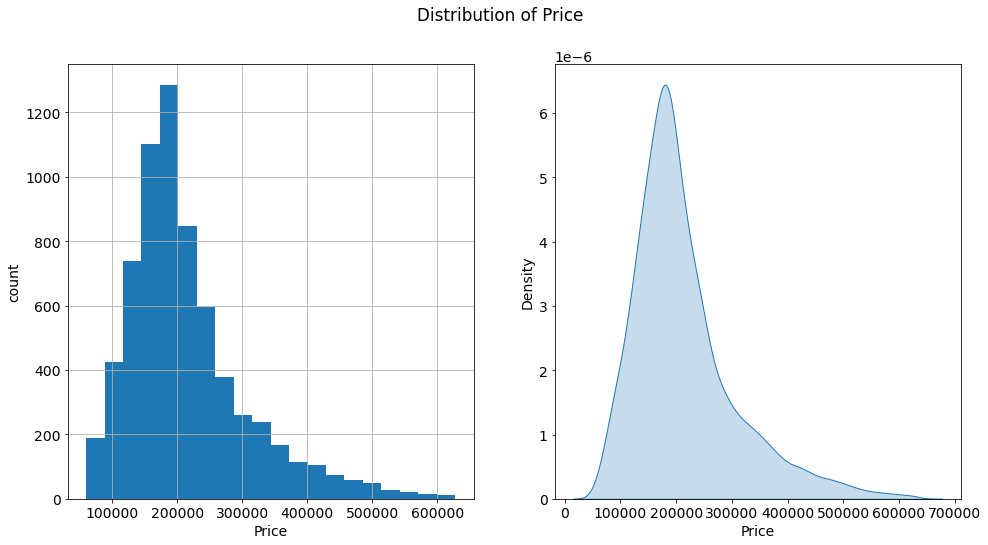

In [128]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
y_train.hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [129]:
df_num_features = X_train.select_dtypes(include=['float64', 'float32', 'float16'])

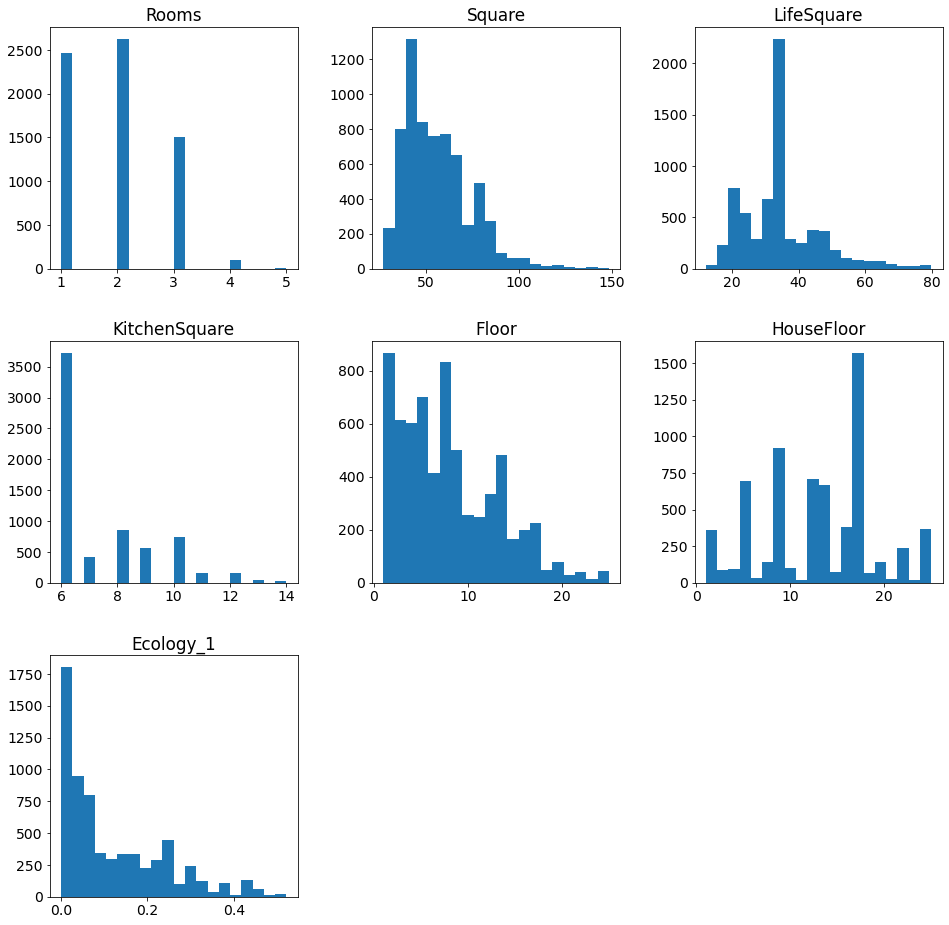

In [130]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

# Построение новых признаков

MedPriceByFloorYear

In [131]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [132]:
X_train = year_to_cat(X_train)
X_train = floor_to_cat(X_train)

X_valid = year_to_cat(X_valid)
X_valid = floor_to_cat(X_valid)

df_test = year_to_cat(df_test)
df_test = floor_to_cat(df_test)

df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,year_cat,floor_cat
0,4567,44,1.0,36.847630,19.094182,6.0,5.0,9.0,1970,0.036122,...,B,24,4378,0,1,1,B,0,3,2
1,5925,62,1.0,42.493907,29.493907,10.0,7.0,17.0,2017,0.072158,...,B,2,629,1,0,0,A,0,6,3
2,960,27,2.0,59.463678,32.679351,9.0,19.0,19.0,1977,0.211401,...,B,9,1892,0,0,1,B,0,3,5
3,3848,23,3.0,49.646030,33.893825,6.0,2.0,2.0,1965,0.014073,...,B,2,475,0,0,0,B,0,3,1
4,746,74,1.0,53.837056,32.679351,6.0,8.0,17.0,1977,0.309479,...,B,35,7715,4,0,6,B,0,3,3


In [133]:
class FeatureGenerator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
                
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X

In [134]:
featgen = FeatureGenerator()
featgen.fit(X_train)
featgen.fit(X_valid)
featgen.fit(df_test)


X_train = featgen.transform(X_train)
X_valid = featgen.transform(X_valid)
df_test = featgen.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((6700, 24), (3300, 24), (5000, 24))

In [135]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,year_cat,floor_cat,DistrictSize,new_district,IsDistrictLarge
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000
mean,8412.595400,51.279200,1.905800,56.302452,34.227152,7.342000,7.981000,12.726000,1984.658800,0.119874,...,8.262600,1.31940,4.242800,0.917600,0.00100,3.794000,2.813000,115.537200,0.0,0.325000
std,4832.674037,44.179466,0.806137,18.247287,11.327089,1.828908,5.174939,6.042369,18.053342,0.120070,...,23.863762,1.47994,4.777365,0.275001,0.03161,1.158548,1.270572,127.381882,0.0,0.468422
min,1.000000,0.000000,1.000000,27.000000,12.234303,6.000000,1.000000,1.000000,1930.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.0,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,27.261219,6.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,0.00000,1.000000,1.000000,0.00000,3.000000,2.000000,27.000000,0.0,0.000000
50%,8320.500000,37.000000,2.000000,52.822200,32.679351,6.000000,7.000000,12.000000,1977.000000,0.072158,...,2.000000,1.00000,3.000000,1.000000,0.00000,3.000000,3.000000,49.000000,0.0,0.000000
75%,12598.250000,77.000000,2.000000,66.233526,38.861625,9.000000,12.000000,17.000000,2000.000000,0.195781,...,5.000000,2.00000,6.000000,1.000000,0.00000,4.000000,4.000000,257.000000,0.0,1.000000
max,16795.000000,212.000000,5.000000,148.783492,79.793732,14.000000,25.000000,25.000000,2020.000000,0.521867,...,141.000000,6.00000,23.000000,1.000000,1.00000,6.000000,5.000000,391.000000,0.0,1.000000


# Построение модели

Оценка модели

In [136]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [137]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Оценка модели

Train R2:	0.959
Test R2:	0.742


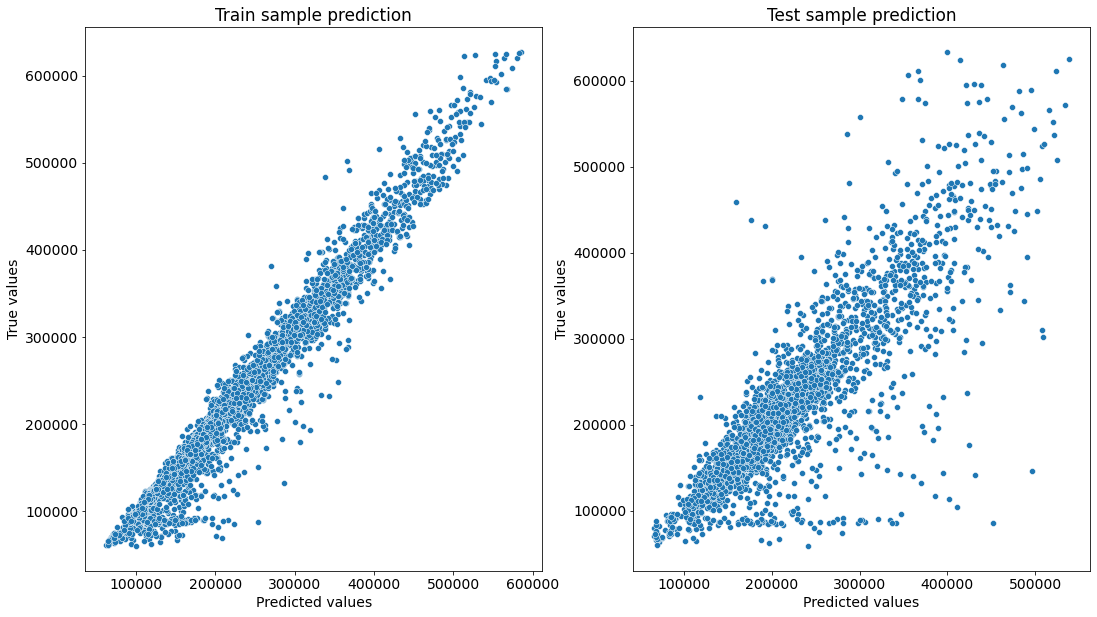

In [138]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

# Прогнозирование на тестовом датасете

In [139]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,year_cat,floor_cat,DistrictSize,new_district,IsDistrictLarge
0,4567,44,1.0,36.847630,19.094182,6.0,5.0,9.0,1970,0.036122,...,0,1,1,1,0,3,2,46,0,0
1,5925,62,1.0,42.493907,29.493907,10.0,7.0,17.0,2017,0.072158,...,1,0,0,0,0,6,3,122,0,1
2,960,27,2.0,59.463678,32.679351,9.0,19.0,19.0,1977,0.211401,...,0,0,1,1,0,3,5,391,0,1
3,3848,23,3.0,49.646030,33.893825,6.0,2.0,2.0,1965,0.014073,...,0,0,0,1,0,3,1,264,0,1
4,746,74,1.0,53.837056,32.679351,6.0,8.0,17.0,1977,0.309479,...,4,0,6,1,0,3,3,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,6.0,5.0,5.0,1962,0.069660,...,4,1,2,1,0,3,2,60,0,0
4996,16138,38,3.0,93.698122,32.679351,10.0,12.0,12.0,2018,0.060753,...,2,0,7,1,0,6,4,16,0,0
4997,3912,101,1.0,33.656723,19.003259,6.0,2.0,5.0,1966,0.038693,...,1,2,5,1,0,3,1,46,0,0
4998,5722,10,1.0,38.635155,20.976257,9.0,8.0,14.0,1970,0.089040,...,5,0,11,1,0,3,3,16,0,0


In [140]:
submit = pd.read_csv('C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [141]:
predictions = rf_model.predict(df_test)
predictions

array([157624.88597935, 114622.4906073 , 141269.50891826, ...,
       142342.13031074, 187515.7998816 , 260761.91532739])

In [142]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,157624.885979
1,5925,114622.490607
2,960,141269.508918
3,3848,149874.042425
4,746,178163.474370


In [143]:
submit.to_csv('C:/Users/Dell/Desktop/Программы/project_data_from_kaggle/rf_submit2.csv', index=False)